### Notebook to extract the boundaries of the TXLA model for regionally refined MPAS-O mesh

In [2]:
#Packages 
import numpy as np
import xarray as xr

import glob
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import ticker
from matplotlib.dates import DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xroms 
import xgcm
from xgcm import Grid
import xarray as xr
import pandas as pd 
import geopandas as gpd

#Cartopy
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                edgecolor='face',
                                facecolor=cfeature.COLORS['land'])

states_provinces = cfeature.NaturalEarthFeature(
                   category='cultural',
                   name='admin_1_states_provinces_lines',
                   scale='110m',
                   facecolor='none')
crs = ccrs.PlateCarree(central_longitude=0)

In [3]:
path = glob.glob('/d1/shared/TXLA_ROMS/numerical_mixing/non-nest/ver1/1hr/ocean_avg_0000*.nc')
ds = xroms.open_mfnetcdf(path)
ds, grid = xroms.roms_dataset(ds)

### Remake Fig. 1 of Schlichting et al. 2023 JAMES for context 

Text(-90.5, 30.5, 'Mississippi River')

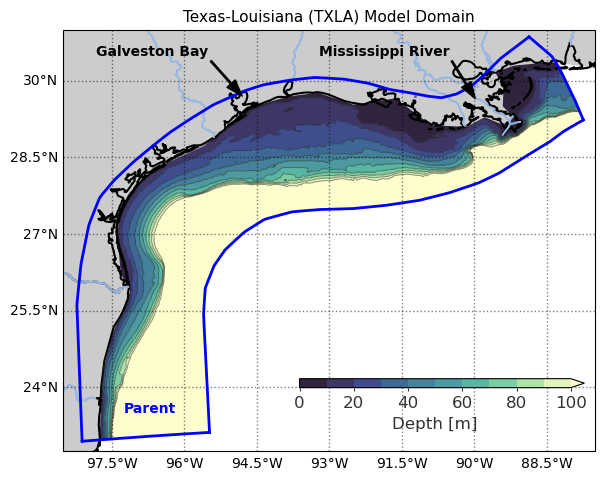

In [4]:
hlevs = np.arange(10,110,10)  # isobath contour depths

crs = ccrs.PlateCarree()

fig,ax = plt.subplots(1, figsize = (5.4,4.5), subplot_kw={'projection': crs}, constrained_layout = True)

#Plot the depth. 
mappable = ax.contourf(ds.lon_rho,
                       ds.lat_rho,
                       ds.h, 
                       cmap = cmo.deep_r,
                       levels = [0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100],
                       extend = 'max',
                       transform = ccrs.PlateCarree())

ax.contour(ds.lon_rho.values, 
           ds.lat_rho.values, 
           ds.h, hlevs, 
           colors='0.15', 
           transform=ccrs.PlateCarree(), 
           linewidths=.75, alpha = 0.5)

ax.set_extent([-98.5, -87.5, 22.75, 31], ccrs.PlateCarree())

#Add grid boundaries
ax.plot(ds.lon_rho[-1,:], ds.lat_rho[-1,:], 'b', lw=2,transform = cartopy.crs.PlateCarree())
ax.plot(ds.lon_rho[0,:], ds.lat_rho[0,:], 'b', lw=2,transform = cartopy.crs.PlateCarree())
ax.plot(ds.lon_rho[:,0], ds.lat_rho[:,0], 'b', lw=2,transform = cartopy.crs.PlateCarree())
ax.plot(ds.lon_rho[:,-1], ds.lat_rho[:,-1], 'b', lw=2,transform = cartopy.crs.PlateCarree())

#Colorbar
cax = fig.add_axes([0.445, 0.15, 0.5275, 0.02]) 
cb = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cb.set_label(r'Depth [m]', fontsize=12, color='0.2')
cb.ax.tick_params(labelsize=12, length=2, color='0.2', labelcolor='0.2')
cb.set_ticks([0, 20, 40, 60, 80, 100])

#Lat and lon grid lines
gl = ax.gridlines(linewidth=1, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True

#Map features from cartopy. Add land, coastline, borders and rivers. 
ax.add_feature(land_10m, facecolor='0.8', linewidth = 1.5)
ax.coastlines(resolution='10m', linewidth = 1.5)  
ax.add_feature(cfeature.BORDERS, linewidth=1.5)
ax.add_feature(cartopy.feature.RIVERS, linewidth=1.5)
ax.set_aspect('auto') #aspect ratio

#Add text to landmarks/title
ax.set_title('Texas-Louisiana (TXLA) Model Domain', fontsize = 11)
# ax.annotate('Child', xy = (-93.5, 27.52), color = 'r', rotation = 10, fontsize = 10, fontweight='bold')
ax.annotate('Parent', xy = (-97.25, 23.5), color = 'b', fontsize = 10, fontweight='bold')
ax.annotate('Galveston Bay', xy = (-94.8, 29.7), xytext = (-95.5, 30.5),
            arrowprops = dict(facecolor = 'black', width = 1, headwidth = 8,),
            color = 'k', fontsize = 10, horizontalalignment='right',  fontweight='bold')
ax.annotate('Mississippi River', xytext = (-90.5, 30.5), xy = (-89.98, 29.65),
            arrowprops = dict(facecolor = 'black', width = 1, headwidth = 8),
            color = 'k', fontsize = 10, horizontalalignment='right', fontweight='bold')

# plt.savefig('domain_overview.jpg', dpi = 300, format = 'eps', bbox_inches='tight', )

### The values we want are below, but we need to subset so the polygon is reasonably sized 
> - ds.lon_rho[-1,:], ds.lat_rho[-1,:]
> - ds.lon_rho[0,:], ds.lat_rho[0,:]
> - ds.lon_rho[:,0], ds.lat_rho[:,0]
> - ds.lon_rho[:,-1], ds.lat_rho[:,-1]

In [13]:
print(ds.lon_rho[-1,0].values)
print(ds.lat_rho[-1,0].values)

-98.11244723696716
22.94120793648476


In [35]:
print(ds.lon_rho[-1,0].values, ds.lat_rho[-1,0].values)
print(ds.lon_rho[-1,0].values, ds.lat_rho[-1,0].values)

-98.11244723696716 22.94120793648476
-95.47600921410363 23.11387674346726


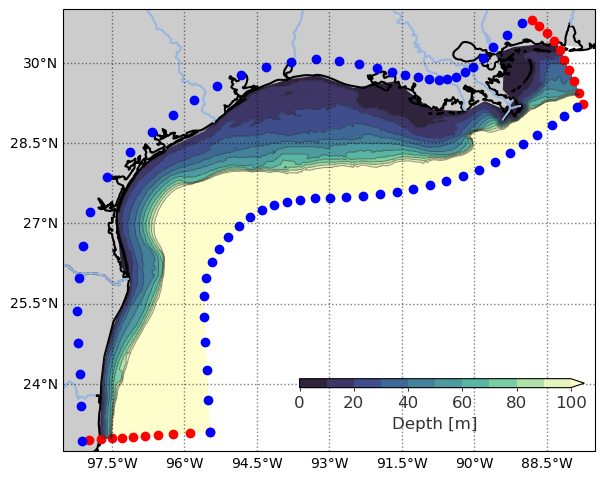

In [101]:
hlevs = np.arange(10,110,10)  # isobath contour depths

crs = ccrs.PlateCarree()

fig,ax = plt.subplots(1, figsize = (5.4,4.5), subplot_kw={'projection': crs}, constrained_layout = True)

#Plot the depth. 
mappable = ax.contourf(ds.lon_rho,
                       ds.lat_rho,
                       ds.h, 
                       cmap = cmo.deep_r,
                       levels = [0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100],
                       extend = 'max',
                       transform = ccrs.PlateCarree())

ax.contour(ds.lon_rho.values, 
           ds.lat_rho.values, 
           ds.h, hlevs, 
           colors='0.15', 
           transform=ccrs.PlateCarree(), 
           linewidths=.75, alpha = 0.5)

ax.set_extent([-98.5, -87.5, 22.75, 31], ccrs.PlateCarree())


#Colorbar
cax = fig.add_axes([0.445, 0.15, 0.5275, 0.02]) 
cb = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cb.set_label(r'Depth [m]', fontsize=12, color='0.2')
cb.ax.tick_params(labelsize=12, length=2, color='0.2', labelcolor='0.2')
cb.set_ticks([0, 20, 40, 60, 80, 100])

#Lat and lon grid lines
gl = ax.gridlines(linewidth=1, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True

#Map features from cartopy. Add land, coastline, borders and rivers. 
ax.add_feature(land_10m, facecolor='0.8', linewidth = 1.5)
ax.coastlines(resolution='10m', linewidth = 1.5)  
ax.add_feature(cfeature.BORDERS, linewidth=1.5)
ax.add_feature(cartopy.feature.RIVERS, linewidth=1.5)
ax.set_aspect('auto') #aspect ratio

#Add grid boundaries
ax.scatter(ds.lon_rho[::20,0], ds.lat_rho[::20,0], color = 'red', transform = cartopy.crs.PlateCarree()) #SOUTH
ax.scatter(ds.lon_rho[::20,-1], ds.lat_rho[::20,-1], color = 'red', transform = cartopy.crs.PlateCarree()) #NORTHEAST
ax.scatter(ds.lon_rho[-1,::20], ds.lat_rho[-1,::20], color = 'b', transform = cartopy.crs.PlateCarree()) # NORTHWEST
ax.scatter(ds.lon_rho[0,::20], ds.lat_rho[0,::20], color = 'b', transform = cartopy.crs.PlateCarree()) #SOUTHEAST

### Print these values 

In [86]:
print(ds.lon_rho[::20,0].values, ds.lat_rho[::20,0].values) #SOUTH
print(ds.lon_rho[::20,-1].values, ds.lat_rho[::20,-1].values) #NORTHEAST
print(ds.lon_rho[-1,::20].values, ds.lat_rho[-1,::20].values) #NORTHWEST
print(ds.lon_rho[0,::20].values, ds.lat_rho[0,::20].values) #SOUTHEAST

[-95.47600921 -95.8708932  -96.22572222 -96.53901583 -96.81415251
 -97.05822638 -97.28178861 -97.49814103 -97.72236101 -97.971046  ] [23.11387674 23.09153029 23.07016219 23.05046236 23.03252422 23.01611409
 23.00067718 22.9853793  22.96918363 22.95097732]
[-87.74149609 -87.83396761 -87.93941022 -88.04231271 -88.13876555
 -88.23528326 -88.34590157 -88.50062389 -88.64991325 -88.79605002] [29.23234048 29.44056547 29.66240709 29.86662931 30.05564005 30.23782693
 30.40905641 30.56576991 30.68600007 30.80304166]
[-98.11244724 -98.13944376 -98.16413669 -98.18806633 -98.2118573
 -98.18293394 -98.09831936 -97.95392768 -97.60625379 -97.12736616
 -96.67543717 -96.23404345 -95.7871098  -95.32028935 -94.83192931
 -94.29853291 -93.78486338 -93.27704224 -92.80665119 -92.37846483
 -92.00437205 -91.71069165 -91.43027485 -91.1641852  -90.93240318
 -90.72619786 -90.55661965 -90.36950018 -90.19295601 -90.01567667
 -89.82545987 -89.61188572 -89.32808826 -89.01311629] [22.94120794 23.58818031 24.19134838 24

### Create a naive slice by hand at ```https://geojson.io```
Upload geojason map and compare 

In [107]:
df_gom = gpd.read_file('map.geojson')
df_gom

,name,component,object,author,geometry
0,region for CUSP mesh,ocean,region,Dylan Schlichting,"POLYGON ((-88.15975 29.64068, -88.71303 30.460..."


<GeoAxesSubplot:>

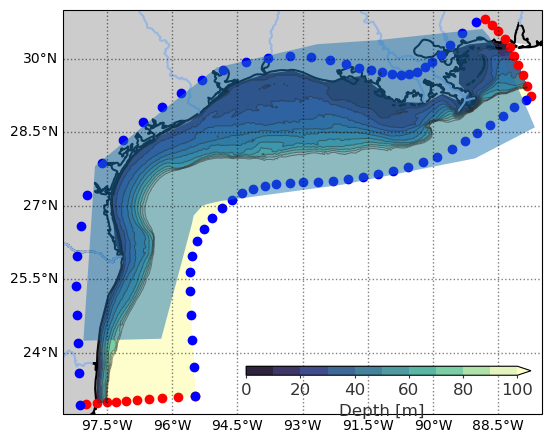

In [111]:
hlevs = np.arange(10,110,10)  # isobath contour depths

crs = ccrs.PlateCarree()

fig,ax = plt.subplots(1, figsize = (5.4,4.5), subplot_kw={'projection': crs}, constrained_layout = True)

#Plot the depth. 
mappable = ax.contourf(ds.lon_rho,
                       ds.lat_rho,
                       ds.h, 
                       cmap = cmo.deep_r,
                       levels = [0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100],
                       extend = 'max',
                       transform = ccrs.PlateCarree())

ax.contour(ds.lon_rho.values, 
           ds.lat_rho.values, 
           ds.h, hlevs, 
           colors='0.15', 
           transform=ccrs.PlateCarree(), 
           linewidths=.75, alpha = 0.5)

ax.set_extent([-98.5, -87.5, 22.75, 31], ccrs.PlateCarree())


#Colorbar
cax = fig.add_axes([0.445, 0.15, 0.5275, 0.02]) 
cb = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cb.set_label(r'Depth [m]', fontsize=12, color='0.2')
cb.ax.tick_params(labelsize=12, length=2, color='0.2', labelcolor='0.2')
cb.set_ticks([0, 20, 40, 60, 80, 100])

#Lat and lon grid lines
gl = ax.gridlines(linewidth=1, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True

#Map features from cartopy. Add land, coastline, borders and rivers. 
ax.add_feature(land_10m, facecolor='0.8', linewidth = 1.5)
ax.coastlines(resolution='10m', linewidth = 1.5)  
ax.add_feature(cfeature.BORDERS, linewidth=1.5)
ax.add_feature(cartopy.feature.RIVERS, linewidth=1.5)
ax.set_aspect('auto') #aspect ratio

#Add grid boundaries
ax.scatter(ds.lon_rho[::20,0], ds.lat_rho[::20,0], color = 'red', transform = cartopy.crs.PlateCarree()) #SOUTH
ax.scatter(ds.lon_rho[::20,-1], ds.lat_rho[::20,-1], color = 'red', transform = cartopy.crs.PlateCarree()) #NORTHEAST
ax.scatter(ds.lon_rho[-1,::20], ds.lat_rho[-1,::20], color = 'b', transform = cartopy.crs.PlateCarree()) # NORTHWEST
ax.scatter(ds.lon_rho[0,::20], ds.lat_rho[0,::20], color = 'b', transform = cartopy.crs.PlateCarree()) #SOUTHEAST

#GEOJSON file 
df_gom['geometry'].plot(ax = ax, transform = cartopy.crs.PlateCarree(), alpha = 0.5)

### Try combining the two arrays for each boundary. 

In [117]:
np.array([ds.lon_rho[0,0].values, ds.lat_rho[0,0].values])

array([-95.47600921,  23.11387674])

In [119]:
south = np.array([ds.lon_rho[::20,0].values, ds.lat_rho[::20,0].values])
south

array([[-95.47600921, -95.8708932 , -96.22572222, -96.53901583,
        -96.81415251, -97.05822638, -97.28178861, -97.49814103,
        -97.72236101, -97.971046  ],
       [ 23.11387674,  23.09153029,  23.07016219,  23.05046236,
         23.03252422,  23.01611409,  23.00067718,  22.9853793 ,
         22.96918363,  22.95097732]])

### Now do the rest then merge 

In [121]:
southwest = np.array([ds.lon_rho[::20,0].values, ds.lat_rho[::20,0].values])
northeast = np.array([ds.lon_rho[::20,-1].values, ds.lat_rho[::20,-1].values])
northwest = np.array([ds.lon_rho[-1,::20].values, ds.lat_rho[-1,::20].values])
southeast = np.array([ds.lon_rho[0,::20].values, ds.lat_rho[0,::20].values])
southwest

array([[-95.47600921, -95.8708932 , -96.22572222, -96.53901583,
        -96.81415251, -97.05822638, -97.28178861, -97.49814103,
        -97.72236101, -97.971046  ],
       [ 23.11387674,  23.09153029,  23.07016219,  23.05046236,
         23.03252422,  23.01611409,  23.00067718,  22.9853793 ,
         22.96918363,  22.95097732]])

### Trace the polygon - this has to be done in order and copied and pasted into the geojson editor

In [145]:
for i in range(np.shape(northwest)[1]):
    print(northwest[:,i])

[-98.11244724  22.94120794]
[-98.13944376  23.58818031]
[-98.16413669  24.19134838]
[-98.18806633  24.7745027 ]
[-98.2118573   25.35811744]
[-98.18293394  25.9765992 ]
[-98.09831936  26.58697512]
[-97.95392768  27.22210573]
[-97.60625379  27.87737569]
[-97.12736616  28.34207391]
[-96.67543717  28.70478798]
[-96.23404345  29.02672938]
[-95.7871098   29.30260684]
[-95.32028935  29.56274331]
[-94.83192931  29.76793136]
[-94.29853291  29.93092021]
[-93.78486338  30.01439203]
[-93.27704224  30.06301387]
[-92.80665119  30.03787578]
[-92.37846483  29.98171585]
[-92.00437205  29.8998191 ]
[-91.71069165  29.82273041]
[-91.43027485  29.77988609]
[-91.1641852   29.73388823]
[-90.93240318  29.69472619]
[-90.72619786  29.67118902]
[-90.55661965  29.69481782]
[-90.36950018  29.73948131]
[-90.19295601  29.8253211 ]
[-90.01567667  29.93045823]
[-89.82545987  30.08611608]
[-89.61188572  30.28909533]
[-89.32808826  30.52813556]
[-89.01311629  30.75332383]


In [146]:
for i in range(np.shape(northeast)[1]):
    print(northeast[:,i])

[-87.74149609  29.23234048]
[-87.83396761  29.44056547]
[-87.93941022  29.66240709]
[-88.04231271  29.86662931]
[-88.13876555  30.05564005]
[-88.23528326  30.23782693]
[-88.34590157  30.40905641]
[-88.50062389  30.56576991]
[-88.64991325  30.68600007]
[-88.79605002  30.80304166]


### Reverse the order so the polygon is tracer sequentially 

In [147]:
for i in range(np.shape(northeast)[1]):
    print(northeast[:,::-1][:,i])

[-88.79605002  30.80304166]
[-88.64991325  30.68600007]
[-88.50062389  30.56576991]
[-88.34590157  30.40905641]
[-88.23528326  30.23782693]
[-88.13876555  30.05564005]
[-88.04231271  29.86662931]
[-87.93941022  29.66240709]
[-87.83396761  29.44056547]
[-87.74149609  29.23234048]


In [148]:
for i in range(np.shape(southeast)[1]):
    print(southeast[:,i])

[-95.47600921  23.11387674]
[-95.50685597  23.69925018]
[-95.53751963  24.25965853]
[-95.56663596  24.78071581]
[-95.5910882   25.25091136]
[-95.58539314  25.64989214]
[-95.54822747  25.98040827]
[-95.42464829  26.27948261]
[-95.27082291  26.53120396]
[-95.08504211  26.75082624]
[-94.857133    26.95076733]
[-94.63041851  27.11305991]
[-94.39075985  27.25623089]
[-94.14905907  27.33629771]
[-93.87118737  27.40746344]
[-93.5991148   27.44730242]
[-93.2951875   27.47144838]
[-92.98237204  27.48396304]
[-92.64801068  27.49200153]
[-92.29610167  27.51618121]
[-91.95280427  27.54790932]
[-91.60517764  27.59151722]
[-91.26245173  27.63988264]
[-90.91108072  27.71155103]
[-90.57350363  27.7919897 ]
[-90.23745233  27.89475629]
[-89.89690552  28.00505318]
[-89.57010532  28.15248251]
[-89.26213248  28.32521668]
[-88.98106869  28.49223886]
[-88.69808859  28.6569565 ]
[-88.39982115  28.83151006]
[-88.13623714  29.01583751]
[-87.86375539  29.16697497]


### Reverse the order 

In [151]:
for i in range(np.shape(southeast)[1]):
    print(southeast[:,::-1][:,i])

[-87.86375539  29.16697497]
[-88.13623714  29.01583751]
[-88.39982115  28.83151006]
[-88.69808859  28.6569565 ]
[-88.98106869  28.49223886]
[-89.26213248  28.32521668]
[-89.57010532  28.15248251]
[-89.89690552  28.00505318]
[-90.23745233  27.89475629]
[-90.57350363  27.7919897 ]
[-90.91108072  27.71155103]
[-91.26245173  27.63988264]
[-91.60517764  27.59151722]
[-91.95280427  27.54790932]
[-92.29610167  27.51618121]
[-92.64801068  27.49200153]
[-92.98237204  27.48396304]
[-93.2951875   27.47144838]
[-93.5991148   27.44730242]
[-93.87118737  27.40746344]
[-94.14905907  27.33629771]
[-94.39075985  27.25623089]
[-94.63041851  27.11305991]
[-94.857133    26.95076733]
[-95.08504211  26.75082624]
[-95.27082291  26.53120396]
[-95.42464829  26.27948261]
[-95.54822747  25.98040827]
[-95.58539314  25.64989214]
[-95.5910882   25.25091136]
[-95.56663596  24.78071581]
[-95.53751963  24.25965853]
[-95.50685597  23.69925018]
[-95.47600921  23.11387674]


In [154]:
for i in range(np.shape(southwest)[1]):
    print(southwest[:,i])

[-95.47600921  23.11387674]
[-95.8708932   23.09153029]
[-96.22572222  23.07016219]
[-96.53901583  23.05046236]
[-96.81415251  23.03252422]
[-97.05822638  23.01611409]
[-97.28178861  23.00067718]
[-97.49814103  22.9853793 ]
[-97.72236101  22.96918363]
[-97.971046    22.95097732]


### Backup of jeojson!

In [ ]:
{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {
        "name": "region for TXLA mesh",
        "component": "ocean",
        "object": "region",
        "author": "Dylan Schlichting"
      },
      "geometry": {
        "coordinates": [
          [
     [-98.11244724  ,22.94120794],
[-98.13944376  ,23.58818031],
[-98.16413669  ,24.19134838],
[-98.18806633  ,24.7745027 ],
[-98.2118573   ,25.35811744],
[-98.18293394  ,25.9765992 ],
[-98.09831936  ,26.58697512],
[-97.95392768  ,27.22210573],
[-97.60625379  ,27.87737569],
[-97.12736616  ,28.34207391],
[-96.67543717  ,28.70478798],
[-96.23404345  ,29.02672938],
[-95.7871098   ,29.30260684],
[-95.32028935  ,29.56274331],
[-94.83192931  ,29.76793136],
[-94.29853291  ,29.93092021],
[-93.78486338  ,30.01439203],
[-93.27704224  ,30.06301387],
[-92.80665119  ,30.03787578],
[-92.37846483  ,29.98171585],
[-92.00437205  ,29.8998191 ],
[-91.71069165  ,29.82273041],
[-91.43027485  ,29.77988609],
[-91.1641852   ,29.73388823],
[-90.93240318  ,29.69472619],
[-90.72619786  ,29.67118902],
[-90.55661965  ,29.69481782],
[-90.36950018  ,29.73948131],
[-90.19295601  ,29.8253211 ],
[-90.01567667  ,29.93045823],
[-89.82545987  ,30.08611608],
[-89.61188572  ,30.28909533],
[-89.32808826  ,30.52813556],
[-89.01311629  ,30.75332383],
[-88.79605002  ,30.80304166],
[-88.64991325  ,30.68600007],
[-88.50062389  ,30.56576991],
[-88.34590157  ,30.40905641],
[-88.23528326  ,30.23782693],
[-88.13876555  ,30.05564005],
[-88.04231271  ,29.86662931],
[-87.93941022  ,29.66240709],
[-87.83396761  ,29.44056547],
[-87.74149609  ,29.23234048],
[-87.86375539  ,29.16697497],
[-88.13623714  ,29.01583751],
[-88.39982115  ,28.83151006],
[-88.69808859  ,28.6569565 ],
[-88.98106869  ,28.49223886],
[-89.26213248  ,28.32521668],
[-89.57010532  ,28.15248251],
[-89.89690552  ,28.00505318],
[-90.23745233  ,27.89475629],
[-90.57350363  ,27.7919897 ],
[-90.91108072  ,27.71155103],
[-91.26245173  ,27.63988264],
[-91.60517764  ,27.59151722],
[-91.95280427  ,27.54790932],
[-92.29610167  ,27.51618121],
[-92.64801068  ,27.49200153],
[-92.98237204  ,27.48396304],
[-93.2951875   ,27.47144838],
[-93.5991148   ,27.44730242],
[-93.87118737  ,27.40746344],
[-94.14905907  ,27.33629771],
[-94.39075985  ,27.25623089],
[-94.63041851  ,27.11305991],
[-94.857133    ,26.95076733],
[-95.08504211  ,26.75082624],
[-95.27082291  ,26.53120396],
[-95.42464829  ,26.27948261],
[-95.54822747  ,25.98040827],
[-95.58539314  ,25.64989214],
[-95.5910882   ,25.25091136],
[-95.56663596  ,24.78071581],
[-95.53751963  ,24.25965853],
[-95.50685597  ,23.69925018],
[-95.47600921  ,23.11387674],
[-95.47600921  ,23.11387674],
[-95.8708932   ,23.09153029],
[-96.22572222  ,23.07016219],
[-96.53901583  ,23.05046236],
[-96.81415251  ,23.03252422],
[-97.05822638  ,23.01611409],
[-97.28178861  ,23.00067718],
[-97.49814103  ,22.9853793 ],
[-97.72236101  ,22.96918363],
[-97.971046    ,22.95097732],
            [
  -98.11244724,
  22.94120794
]
          ]
        ],
        "type": "Polygon"
      }
    }
  ]
}

### Reopen the data and plot it 

<GeoAxesSubplot:>

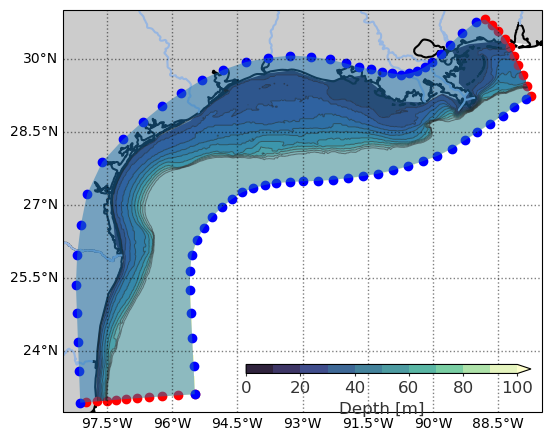

In [156]:
df_gom = gpd.read_file('map_txla.geojson')
df_gom

fig,ax = plt.subplots(1, figsize = (5.4,4.5), subplot_kw={'projection': crs}, constrained_layout = True)

#Plot the depth. 
mappable = ax.contourf(ds.lon_rho,
                       ds.lat_rho,
                       ds.h, 
                       cmap = cmo.deep_r,
                       levels = [0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100],
                       extend = 'max',
                       transform = ccrs.PlateCarree())

ax.contour(ds.lon_rho.values, 
           ds.lat_rho.values, 
           ds.h, hlevs, 
           colors='0.15', 
           transform=ccrs.PlateCarree(), 
           linewidths=.75, alpha = 0.5)

ax.set_extent([-98.5, -87.5, 22.75, 31], ccrs.PlateCarree())


#Colorbar
cax = fig.add_axes([0.445, 0.15, 0.5275, 0.02]) 
cb = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cb.set_label(r'Depth [m]', fontsize=12, color='0.2')
cb.ax.tick_params(labelsize=12, length=2, color='0.2', labelcolor='0.2')
cb.set_ticks([0, 20, 40, 60, 80, 100])

#Lat and lon grid lines
gl = ax.gridlines(linewidth=1, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True

#Map features from cartopy. Add land, coastline, borders and rivers. 
ax.add_feature(land_10m, facecolor='0.8', linewidth = 1.5)
ax.coastlines(resolution='10m', linewidth = 1.5)  
ax.add_feature(cfeature.BORDERS, linewidth=1.5)
ax.add_feature(cartopy.feature.RIVERS, linewidth=1.5)
ax.set_aspect('auto') #aspect ratio

#Add grid boundaries
ax.scatter(ds.lon_rho[::20,0], ds.lat_rho[::20,0], color = 'red', transform = cartopy.crs.PlateCarree()) #SOUTH
ax.scatter(ds.lon_rho[::20,-1], ds.lat_rho[::20,-1], color = 'red', transform = cartopy.crs.PlateCarree()) #NORTHEAST
ax.scatter(ds.lon_rho[-1,::20], ds.lat_rho[-1,::20], color = 'b', transform = cartopy.crs.PlateCarree()) # NORTHWEST
ax.scatter(ds.lon_rho[0,::20], ds.lat_rho[0,::20], color = 'b', transform = cartopy.crs.PlateCarree()) #SOUTHEAST

#GEOJSON file 
df_gom['geometry'].plot(ax = ax, transform = cartopy.crs.PlateCarree(), alpha = 0.5)

### Now start the ultra highres region - do this by hand.
Reload and plot

<GeoAxesSubplot:>

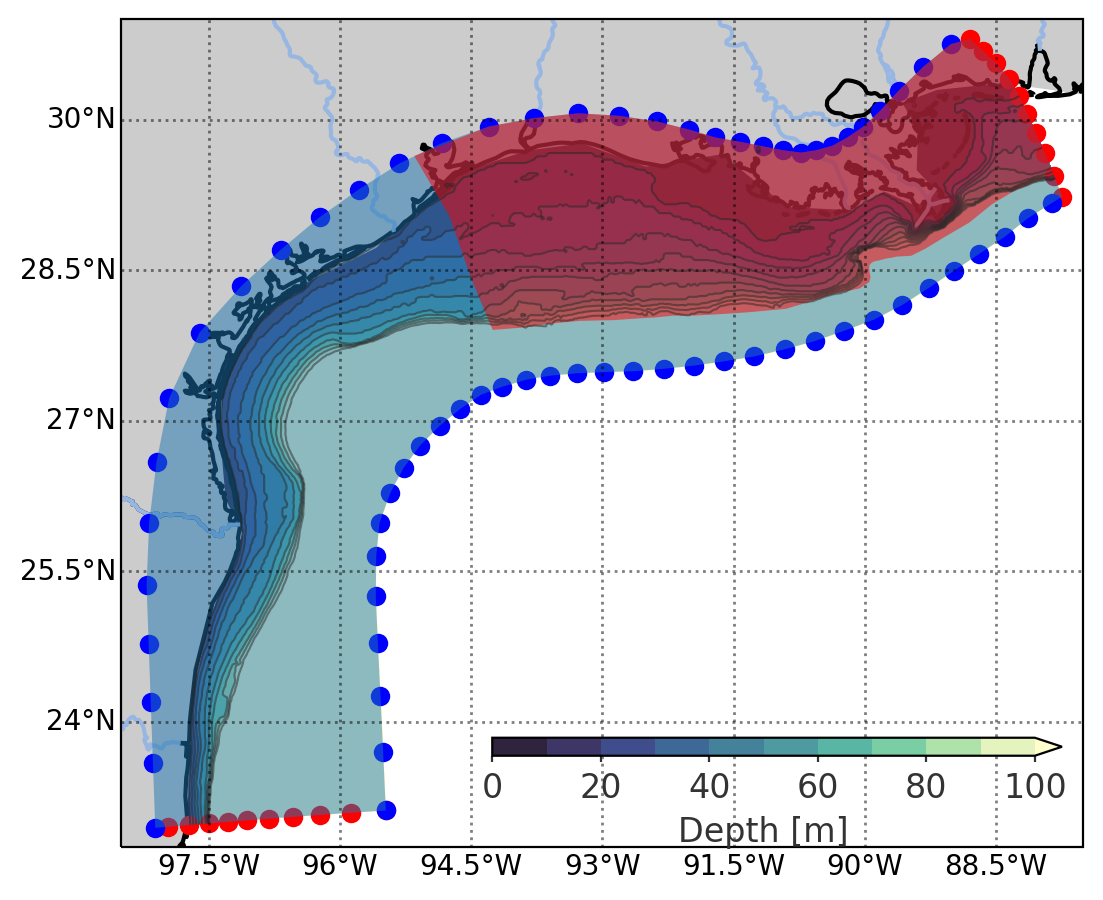

In [164]:
df_gom_inner = gpd.read_file('mpaso_txla_inner.geojson')
df_gom_inner

fig,ax = plt.subplots(1, figsize = (5.4,4.5), subplot_kw={'projection': crs}, constrained_layout = True, dpi = 200)

#Plot the depth. 
mappable = ax.contourf(ds.lon_rho,
                       ds.lat_rho,
                       ds.h, 
                       cmap = cmo.deep_r,
                       levels = [0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100],
                       extend = 'max',
                       transform = ccrs.PlateCarree())

ax.contour(ds.lon_rho.values, 
           ds.lat_rho.values, 
           ds.h, hlevs, 
           colors='0.15', 
           transform=ccrs.PlateCarree(), 
           linewidths=.75, alpha = 0.5)

ax.set_extent([-98.5, -87.5, 22.75, 31], ccrs.PlateCarree())


#Colorbar
cax = fig.add_axes([0.445, 0.15, 0.5275, 0.02]) 
cb = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cb.set_label(r'Depth [m]', fontsize=12, color='0.2')
cb.ax.tick_params(labelsize=12, length=2, color='0.2', labelcolor='0.2')
cb.set_ticks([0, 20, 40, 60, 80, 100])

#Lat and lon grid lines
gl = ax.gridlines(linewidth=1, color='black', alpha=0.5, linestyle='dotted', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.right_labels = False
gl.left_labels = True
gl.top_labels = False
gl.bottom_labels = True

#Map features from cartopy. Add land, coastline, borders and rivers. 
ax.add_feature(land_10m, facecolor='0.8', linewidth = 1.5)
ax.coastlines(resolution='10m', linewidth = 1.5)  
ax.add_feature(cfeature.BORDERS, linewidth=1.5)
ax.add_feature(cartopy.feature.RIVERS, linewidth=1.5)
ax.set_aspect('auto') #aspect ratio

#Add grid boundaries
ax.scatter(ds.lon_rho[::20,0], ds.lat_rho[::20,0], color = 'red', transform = cartopy.crs.PlateCarree()) #SOUTH
ax.scatter(ds.lon_rho[::20,-1], ds.lat_rho[::20,-1], color = 'red', transform = cartopy.crs.PlateCarree()) #NORTHEAST
ax.scatter(ds.lon_rho[-1,::20], ds.lat_rho[-1,::20], color = 'b', transform = cartopy.crs.PlateCarree()) # NORTHWEST
ax.scatter(ds.lon_rho[0,::20], ds.lat_rho[0,::20], color = 'b', transform = cartopy.crs.PlateCarree()) #SOUTHEAST

#GEOJSON file 
df_gom['geometry'].plot(ax = ax, transform = cartopy.crs.PlateCarree(), alpha = 0.5)
df_gom_inner['geometry'].plot(ax = ax, transform = cartopy.crs.PlateCarree(), color = 'r', alpha = 0.5)